# NLP Dataset


This Jupyter notebook serves as an example on how to create a classification model for a text dataset

## Import 

In the following cell we import a lot of libraries. If you get a `ModuleNotFound` error, install the library using `pip`. 

In [10]:
# Python built-in libraries
from pathlib import Path

# Core Math and Visualization Libraries
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# sci-kit (sklearn) is a Machine Learning Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Run this once. 
#nltk.download("punkt")
#nltk.download('wordnet')
#nltk.download('stopwords')

## Step 1. Load and explore the dataset

The first step is to load the dataset file and explore it. When exploring answer the following questions:

Q1. How many samples are there in the dataset?  
Q2. How many labels are there?  
Q3. Is the dataset balanced? If not, what is the distribution? 

In [11]:
# In this cell, we use a built-in Python library to specify paths:

# CWD stands for current working directory
CWD = Path.cwd()
dataset_filepath = CWD.joinpath('dataset', 'IMDB Dataset.csv')

Q4. What does the `cwd` method do? What does the `joinpath` method do?  
Q5. What are 2 additional methods in a `Path` object and describe them?  

#### We use `pandas`, a library to manage CSV files. 

In [12]:
data = pd.read_csv(dataset_filepath, encoding="utf-8")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
types_of_values = data['sentiment'].value_counts()

Q6. `pandas` returns a `DataFrame` object. How can you access individual rows from the CSV file in the `DataFrame` object?

### Use a `matplotlib` a data visualization library to graph the number of labels

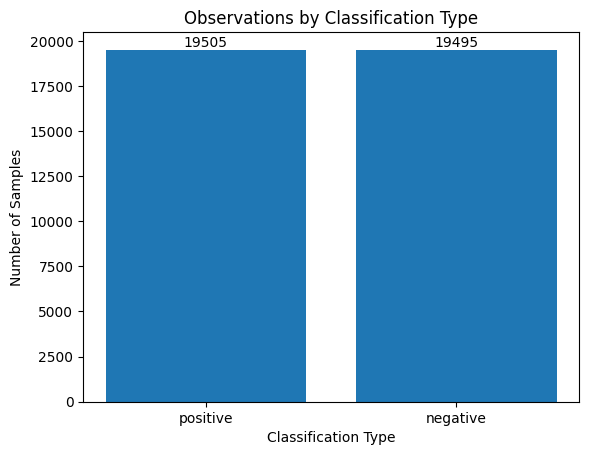

In [14]:
label_counts = data['sentiment'].value_counts()

labels = label_counts.index
counts = label_counts.values

plt.bar(labels, counts)

plt.title("Observations by Classification Type")
plt.xlabel("Classification Type")
plt.ylabel("Number of Samples")

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Q7. What does the `value_counts` method do? What type of object does it return?

## Step 2. Preprocess the dataset and extract features

After we understand the nature of the dataset, in the second step, we split the dataset into train and test sets, and preprocess them. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42, )

Q8. Briefly describe how `train_test_split` method works? What are some additional parameters that the function has and we can provide? Write at least two additional parameters and describe what do they mean

In [16]:
import string

def preprocess_text(text: str) -> str:
    """
    This method processes a text by lower the letters, removing punctuation, removing stopwords, and lemmatizing the words.

    """
    
    lowercase_text = text.lower()
    lowercase_text = lowercase_text.translate(str.maketrans('', '', string.punctuation))
    split_text = lowercase_text.split()

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in split_text if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return " ".join(lemmatized_words)

Q9. In the following code snippet, we use `apply` method to preprocess the text instead of calling `preprocess_text` on each row of the dataset. How does this work? Brielfy describe how to use the `apply` method

In [17]:
preprocessed_X_train = X_train.apply(preprocess_text)
preprocessed_X_test = X_test.apply(preprocess_text)

In [18]:
def create_bag_of_words_model(preprocessed_X_train):
    """
    This method creates a bag of words model from a preprocessed text.

    """
    
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer
    

def create_tfidf_model(preprocessed_X_train):
    """
    This method creates a tfidf model from a preprocessed text.

    """
    
    vectorizer = TfidfVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer


Q10. Describe `CountVectorizer` and `TfidfVectorizer` classes? What do they do?  Have you seen/written code that is similar to the implementation of these details before?    
Q11. What does the `fit_transform` method do?  
Q12. What are two additional methods that both classes have and what do they do?  

In [19]:
x_train, vectorizer = create_bag_of_words_model(preprocessed_X_train)
x_test = vectorizer.transform(preprocessed_X_test)

## Step 3. Train the model

In [20]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model

In [21]:
model = train_model(x_train, y_train)

Q13. What are 2 additional methods of the `MultinomialNB` class? What do they do?  
Q14. What are some other variations of the Naive Bayes model available?   


## Step 4. Evaluate the model

In [22]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [23]:
accuracy, cf_matrix = evaluate_model(model, x_test, y_test)

In [24]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.86


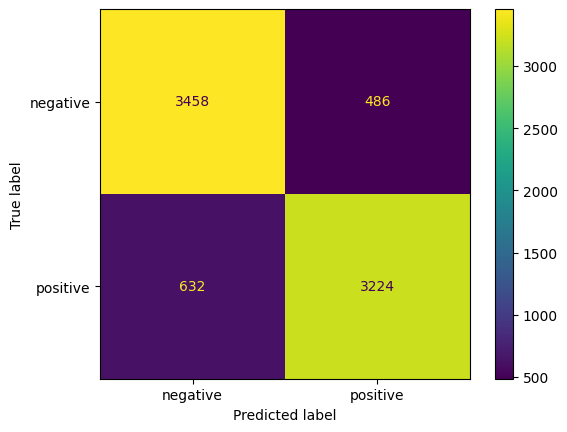

In [25]:
ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_).plot()

Q15. In step 2, we created a Bag of Words model to extract features, and then trained and evaluated the model. In the section below, use the tf-idf model to represent features and train and evaluate the model.   
Q16. Compare the accuracy of the ML model when using Bag of Words model versus TF-IDF model. Which model performed better?

## Step 2 - Using TF IDF vectors to extract features

In [32]:
x_train, vectorizer = create_tfidf_model(preprocessed_X_train)
x_test = vectorizer.transform(preprocessed_X_test)

## Step 3 - Train the model

In [33]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model

In [34]:
model = train_model(x_train, y_train)

## Step 4 - Evaluate the model

In [35]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [36]:
accuracy, cf_matrix = evaluate_model(model, x_test, y_test)

In [37]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.87


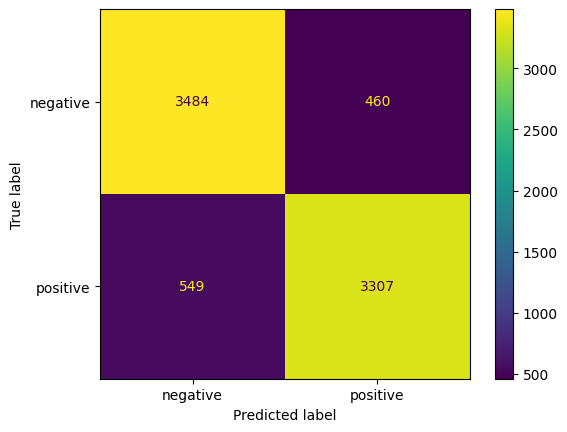

In [38]:
ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_).plot()